# **Curso Python: Ejercicios semana 02**

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **04_missing_values**
- Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC
- Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season
- Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area
- Save the results to an Excel file called "TA_DIC_Season_Areas.xlsx"

In [43]:
def read_csv_to_dataframe(file_path):
 try:
  df = pd.read_csv(file_path)
  return df
 except Exception as e:
  print(f"Error reading the CSV file: {e}")
  return None
read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv").head(3)

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,do_mg_l,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,7.12,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,4.90,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,6.99,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0


In [44]:
dataframe = read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

> **1. Create a new column called "TA_DIC_ratio" that is the ratio of TA to DIC**

In [45]:
dataframe['TA_DIC_ratio'] = dataframe['ta_micromol_kg']/dataframe['dic_micromol_kg']
dataframe.head(3)

,sample,date,estuary,area,station,layer_depth,season,chlorophy_microg_l,cond_microsiemens_cm,depth_m,...,sal_psu,sp_cond_microsiemens_cm,turbidity_fnu,temp_c,latitude,longitude,dic_micromol_kg,ta_micromol_kg,dummy_data,TA_DIC_ratio
0,CDL01S,5/3/2020,Candelaria,River,CDL01,Surface,Dry,0.36,7015.4,0.464,...,3.56,6547.7,1.47,28.740,18.55736,-91.25012,3915,3863,3685.0,0.986718
1,CDL01F,5/3/2020,Candelaria,River,CDL01,Bottom,Dry,4.19,29886.1,7.792,...,16.97,27751.2,95.33,29.028,18.55722,-91.24990,3698,3685,NaN,0.996485
2,CDL02S,5/3/2020,Candelaria,River,CDL02,Surface,Dry,0.92,16691.1,0.453,...,8.94,15429.1,5.50,29.283,18.61007,-91.24410,3724,3708,3708.0,0.995704


> **2. Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season**

In [46]:
# Húmeda
mean_season = dataframe.groupby('season')['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby('season')['TA_DIC_ratio'].std()
mean_rainy = mean_season['Rainy']
desv_rainy = desv_season['Rainy']
print("Estación húmeda")
print(f">> Mediana: {mean_rainy}  >> Desviación estándar: {desv_rainy}")
print("")
# Seca
mean_season = dataframe.groupby('season')['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby('season')['TA_DIC_ratio'].std()
mean_dry= mean_season['Dry']
desv_dry = desv_season['Dry']
print("Estación seca")
print(f">> Mediana: {mean_dry}  >> Desviación estándar: {desv_dry}")



Estación húmeda
>> Mediana: 1.0223495996496486  >> Desviación estándar: 0.10092356808152443

Estación seca
>> Mediana: 1.0585579384004313  >> Desviación estándar: 0.08611149630529746


> **3. Calculate the mean and standard deviation of the "TA_DIC_ratio" for each season and area**

In [47]:
mean_season = dataframe.groupby(['season','area'])['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby(['season','area'])['TA_DIC_ratio'].std()

# SECA
# Costa
mean_dry_coast = mean_season[('Dry','Coast')]
desv_dry_coast = desv_season[('Dry','Coast')]
print("Estación seca")
print(">> Coast")
print(f" - Mediana: {mean_dry_coast}  - Desviación estándar: {desv_dry_coast}")
#Plume
mean_dry_plume = mean_season[('Dry','Plume')]
desv_dry_plume = desv_season[('Dry','Plume')]
print(">> Plume")
print(f" - Mediana: {mean_dry_plume}  - Desviación estándar: {desv_dry_plume}")
#River
mean_dry_river = mean_season[('Dry','River')]
desv_dry_river = desv_season[('Dry','River')]
print(">> River")
print(f" - Mediana: {mean_dry_river}  - Desviación estándar: {desv_dry_river}")
print("")
# HÚMEDA
# Costa
mean_rainy_coast = mean_season[('Rainy','Coast')]
desv_rainy_coast = desv_season[('Rainy','Coast')]
print("Estación húmeda")
print(">> Coast")
print(f" - Mediana: {mean_rainy_coast}  - Desviación estándar: {desv_rainy_coast}")
#Plume
mean_rainy_plume = mean_season[('Rainy','Plume')]
desv_rainy_plume = desv_season[('Rainy','Plume')]
print(">> Plume")
print(f" - Mediana: {mean_rainy_plume}  - Desviación estándar: {desv_rainy_plume}")
#River
mean_rainy_river = mean_season[('Rainy','River')]
desv_rainy_river = desv_season[('Rainy','River')]
print(">> River")
print(f" - Mediana: {mean_rainy_river}  - Desviación estándar: {desv_rainy_river}")

Estación seca
>> Coast
 - Mediana: 1.1157657608048528  - Desviación estándar: 0.11503287148684035
>> Plume
 - Mediana: 1.0596869762001135  - Desviación estándar: 0.03557368133420036
>> River
 - Mediana: 1.0002210781963277  - Desviación estándar: 0.03774663227796748

Estación húmeda
>> Coast
 - Mediana: 1.090126663308005  - Desviación estándar: 0.12965775394316248
>> Plume
 - Mediana: 1.0255437316896632  - Desviación estándar: 0.049222002713097415
>> River
 - Mediana: 0.9452168527096085  - Desviación estándar: 0.02508409583766672


In [48]:
#Alternativa
mean_season = dataframe.groupby(['season','area'])['TA_DIC_ratio'].mean()
desv_season = dataframe.groupby(['season','area'])['TA_DIC_ratio'].std()

estaciones = ['Dry', 'Rainy']
areas = ['Coast', 'Plume', 'River']

for estacion in estaciones:
    print(f"Estación {'seca' if estacion == 'Dry' else 'húmeda'}")
    
    for area in areas:
        mean_val = mean_season[(estacion, area)]
        desv_val = desv_season[(estacion, area)]
        print(f">> {area}")
        print(f"   - Media: {mean_val:.4f}  - Desviación estándar: {desv_val:.4f}")
    print("")

Estación seca
>> Coast
   - Media: 1.1158  - Desviación estándar: 0.1150
>> Plume
   - Media: 1.0597  - Desviación estándar: 0.0356
>> River
   - Media: 1.0002  - Desviación estándar: 0.0377

Estación húmeda
>> Coast
   - Media: 1.0901  - Desviación estándar: 0.1297
>> Plume
   - Media: 1.0255  - Desviación estándar: 0.0492
>> River
   - Media: 0.9452  - Desviación estándar: 0.0251



> **4. Save the results to an Excel file called TA_DIC_Season_Areas.xlsx**

In [49]:
resultados = [['Rainy','Coast',mean_rainy_coast,desv_rainy_coast],
              ['Rainy','Plume',mean_rainy_plume,desv_rainy_plume],
              ['Rainy','River',mean_rainy_river,desv_rainy_river],
              ['Dry','Coast',mean_dry_coast,desv_dry_coast],
              ['Dry','Plume',mean_dry_plume,desv_dry_plume],
              ['Dry','River',mean_dry_river,desv_dry_river]
             ]
columnas = ['station','area','mean','std']
dataframe_neu = pd.DataFrame(resultados, columns=columnas)
dataframe_neu = dataframe_neu.reset_index()
dataframe_neu.to_excel('folder_resultados/TA_DIC_Season_Areas.xlsx',index=False)
dataframe_neu

,index,station,area,mean,std
0,0,Rainy,Coast,1.090127,0.129658
1,1,Rainy,Plume,1.025544,0.049222
2,2,Rainy,River,0.945217,0.025084
3,3,Dry,Coast,1.115766,0.115033
4,4,Dry,Plume,1.059687,0.035574
5,5,Dry,River,1.000221,0.037747


### **06_plot_descriptive_statistics_matplotib**

> **Plot histogram of DIC and TA**

In [50]:
def read_csv_to_dataframe(file_path):
 try:
  df = pd.read_csv(file_path)
  return df
 except Exception as e:
  print(f"Error reading the CSV file: {e}")
  return None
read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv").head(3)
dataframe_06 = read_csv_to_dataframe("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

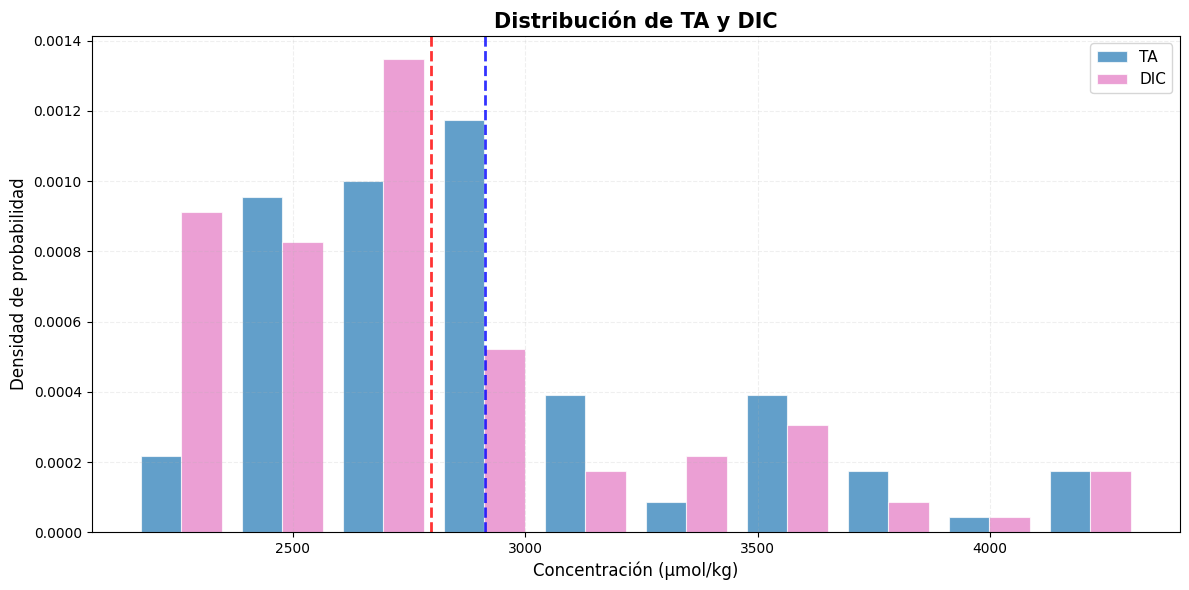

In [51]:
plot06 = dataframe_06[['ta_micromol_kg', 'dic_micromol_kg']]
plt.figure(figsize=(12, 6))
plt.hist([plot06['ta_micromol_kg'].dropna(), plot06['dic_micromol_kg'].dropna()], bins=10, label=['TA', 'DIC'],
         color= ['#1f77b4', '#e377c2'], alpha=0.7, edgecolor='white', linewidth=0.8, density=True)  
plt.xlabel("Concentración (μmol/kg)", fontsize=12)
plt.ylabel("Densidad de probabilidad", fontsize=12)
plt.title("Distribución de TA y DIC", fontsize=15, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(alpha=0.2, linestyle='--')
plt.tight_layout()
plt.axvline(plot06['ta_micromol_kg'].mean(), color='blue', linestyle='--', alpha=0.8, linewidth=2)
plt.axvline(plot06['dic_micromol_kg'].mean(), color='red', linestyle='--', alpha=0.8, linewidth=2)
plt.show()

### **07_plot_descriptive_statistics_seaborn**

> **How can you modify the units of the figures?**

*Respuesta: si se está hablando de las unidades de medición, estas se pueden modificar por medio de ax.set, en las etiquetas del eje x e y*

In [52]:
seaborn07 = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

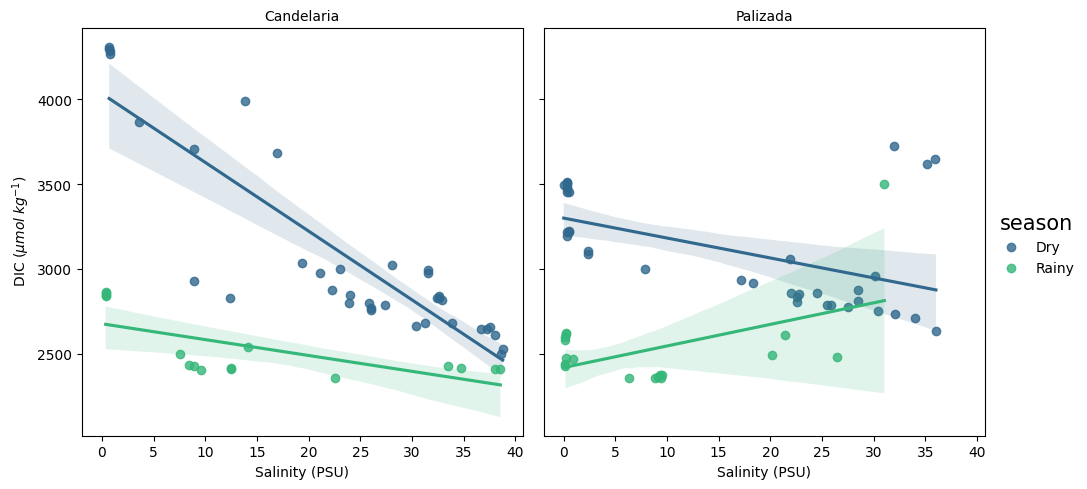

In [53]:
ax = sns.lmplot(x="sal_psu", y="ta_micromol_kg",hue="season",col="estuary",data=seaborn07, 
                height=5, aspect=1, palette="viridis")
#Cambiar las unidades de un gráfico, con los ejes
ax.set(xlabel='Salinity (PSU)', ylabel=' DIC ($\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.setp(ax._legend.get_title(), fontsize=15)
sns.despine(top=False,right=False)
plt.show()

>**Check the examples at https://seaborn.pydata.org/ and create your own figures. If possible, use your own data**

- Horizontal boxplot with observations

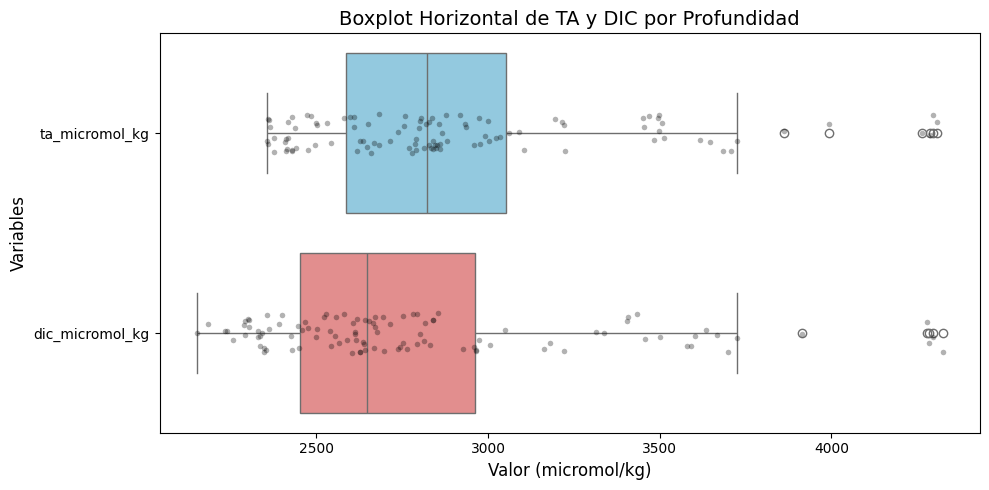

In [54]:
plt.figure(figsize=(10,5))
sns.boxplot(data=seaborn07[['ta_micromol_kg', 'dic_micromol_kg']],orient='h', 
            palette=['skyblue', 'lightcoral'])

sns.stripplot(data=seaborn07[['ta_micromol_kg', 'dic_micromol_kg']], orient='h',  color='black', 
              alpha=0.3, size=4, jitter=True)
plt.xlabel('Valor (micromol/kg)', fontsize=12)
plt.ylabel('Variables', fontsize=12)
plt.title('Boxplot Horizontal de TA y DIC por Profundidad', fontsize=14)
plt.tight_layout()
plt.show()

- PairPlot

<Figure size 1000x500 with 0 Axes>

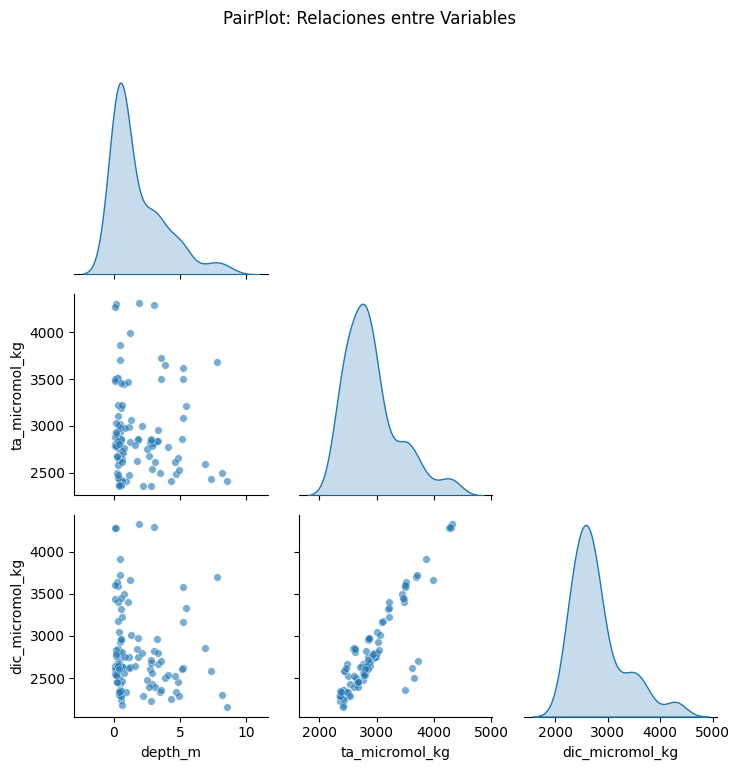

In [55]:
plt.figure(figsize=(10,5))
sns.pairplot(seaborn07[['depth_m', 'ta_micromol_kg', 'dic_micromol_kg']], 
             diag_kind='kde', plot_kws={'alpha': 0.6, 's': 30},corner=True)   
plt.suptitle('PairPlot: Relaciones entre Variables', y=1.02)
plt.tight_layout()
plt.show()

- Scatter Plot

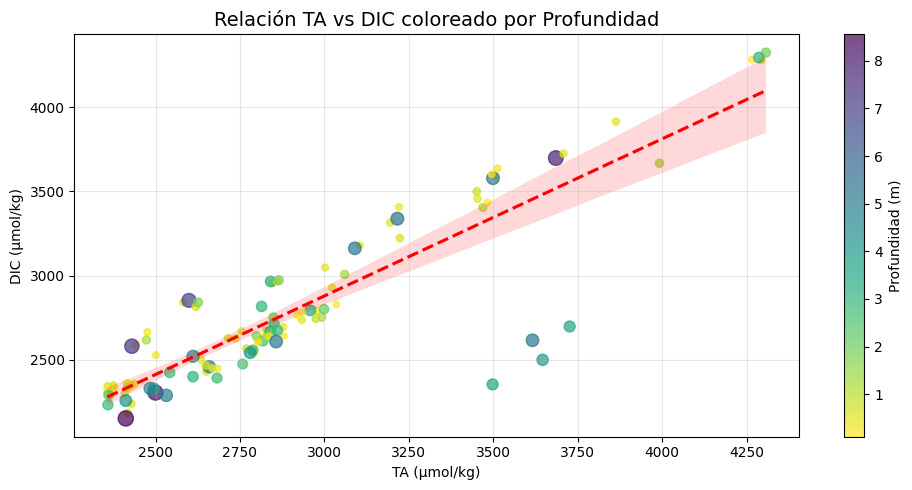

In [56]:
plt.figure(figsize=(10,5))
scatter = plt.scatter(seaborn07['ta_micromol_kg'], seaborn07['dic_micromol_kg'], 
                     c=seaborn07['depth_m'], 
                     s=seaborn07['depth_m']/seaborn07['depth_m'].max()*100 + 20,alpha=0.7, cmap='viridis_r')
cbar = plt.colorbar(scatter)
cbar.set_label('Profundidad (m)')
sns.regplot(data=seaborn07, x='ta_micromol_kg', y='dic_micromol_kg', scatter=False, color='red',line_kws={'linestyle': '--'})
plt.xlabel('TA (μmol/kg)')
plt.ylabel('DIC (μmol/kg)')
plt.title('Relación TA vs DIC coloreado por Profundidad', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **08_normality_tests**

> **When is it appropriate to use the Kolmogorov-Smirnov test instead of the Shapiro-Wilk test?**


*El test de Kolmogorov-Smirnov es apropiado cuando se trabaja con muestras grandes (n > 100), cuando se necesita comparar la distribución de los datos contra distribuciones no normales específicas (como exponencial o uniforme), o cuando el objetivo es comparar dos distribuciones empíricas entre sí. También es más robusto para datos discretos. Por el contrario, el test de Shapiro-Wilk es preferible para muestras pequeñas (n < 50-100) cuando específicamente se quiere evaluar la normalidad de los datos, ya que es considerado más potente y sensible para detectar desviaciones de la distribución normal, siendo especialmente útil cuando el cumplimiento del supuesto de normalidad es crítico para análisis paramétricos posteriores*

>**Based on the previous answer, perform the appropriate test to assess normality in the DIC (Dissolved Inorganic Carbon) and Salinity datasets**

In [57]:
from scipy.stats import shapiro
tests08 = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")
tests08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

In [58]:
parametros = ['dic_micromol_kg', 'sal_psu'] 
for columna in parametros:
    try:
        datos = tests08[columna].dropna() 
        print(f"=== TEST DE NORMALIDAD - {columna.upper()} ===")
        print(f"Tamaño de muestra: {len(datos)}")
        # Realizar test de Shapiro-Wilk
        stat, p = shapiro(datos)
        print(f'Estadístico = {stat:.5f}, p-valor = {p:.5f}')
        # Interpretación
        if p > 0.05:
            print("La distribución es normal (no se rechaza H0)")
        else:
            print("La distribución NO es normal (se rechaza H0)")
        print("")
    except Exception as e:
        print(f"Error al procesar {columna}: {e}")
        print("")

=== TEST DE NORMALIDAD - DIC_MICROMOL_KG ===
Tamaño de muestra: 106
Estadístico = 0.85997, p-valor = 0.00000
La distribución NO es normal (se rechaza H0)

=== TEST DE NORMALIDAD - SAL_PSU ===
Tamaño de muestra: 106
Estadístico = 0.88666, p-valor = 0.00000
La distribución NO es normal (se rechaza H0)



### **09_NonParametric_Mann_whitney**

>**Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses**

In [59]:
from scipy.stats import mannwhitneyu
tests09 = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [60]:
def mann_whitney_test(data1, data2, alpha=0.05):
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    if result.pvalue < alpha:
        print(">> The difference is statistically significant.")
    else:
        print(">> The difference is not statistically significant.")
    print("")

In [61]:
#Temperatura
print("Temperatura")
ta_dry = tests09.loc[tests09["season"] == "Dry", "temp_c"]
ta_rainy = tests09.loc[tests09["season"] == "Rainy", "temp_c"]
mann_whitney_test(ta_dry, ta_rainy)
#DIC
print("DIC")
ta_dry = tests09.loc[tests09["season"] == "Dry", "dic_micromol_kg"]
ta_rainy = tests09.loc[tests09["season"] == "Rainy", "dic_micromol_kg"]
mann_whitney_test(ta_dry, ta_rainy)


Temperatura
U statistic = 551.0
p-value = 5.317160670684041e-06
>> The difference is statistically significant.

DIC
U statistic = 1942.5
p-value = 1.1746695070093671e-06
>> The difference is statistically significant.



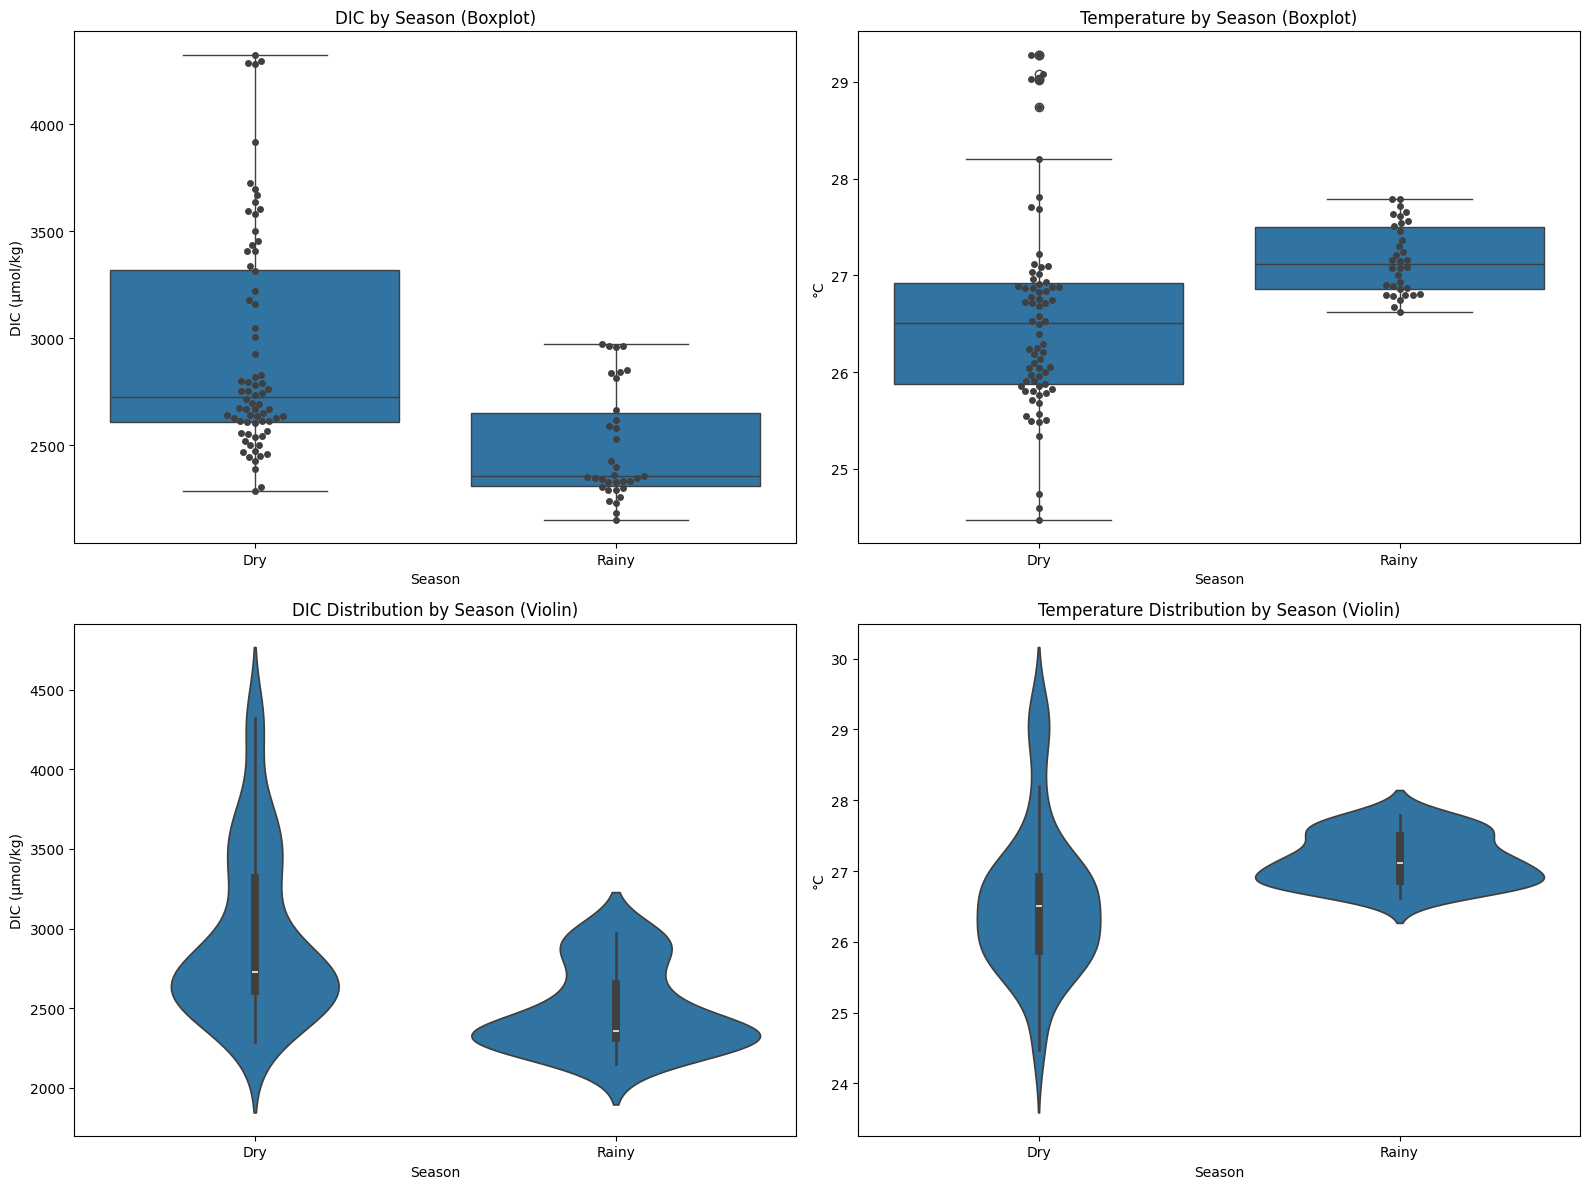

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
# Primer boxplot - DIC
sns.boxplot(x='season', y='dic_micromol_kg', data=tests09, ax=axes[0, 0])
sns.swarmplot(x='season', y='dic_micromol_kg', data=tests09, color=".25", ax=axes[0, 0])
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('DIC (μmol/kg)')
axes[0, 0].set_title('DIC by Season (Boxplot)')
# Segundo boxplot - Temperatura
sns.boxplot(x='season', y='temp_c', data=tests09, ax=axes[0, 1]) 
sns.swarmplot(x='season', y='temp_c', data=tests09, color=".25", ax=axes[0, 1])
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('°C')
axes[0, 1].set_title('Temperature by Season (Boxplot)')
# Violin - DIC
sns.violinplot(x='season', y='dic_micromol_kg', data=tests09, ax=axes[1, 0])
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('DIC (μmol/kg)')
axes[1, 0].set_title('DIC Distribution by Season (Violin)')
# Violin - Temperatura
sns.violinplot(x='season', y='temp_c', data=tests09, ax=axes[1, 1])
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('°C')
axes[1, 1].set_title('Temperature Distribution by Season (Violin)')
# Ajustar layout y mostrar
plt.tight_layout()
plt.show()

### **10_Nonparametric_Kruskall-Wallis**

>**Perform Kruskal-Wallis test and plot a box plot for DIC and temperature data**

In [63]:
from scipy.stats import kruskal
import scikit_posthocs as sp
tests10 = pd.read_csv("../folder_datos/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [64]:
def kruskal_wallis_test(*groups, alpha=0.05):
    result = kruskal(*groups)
    print(f"H statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    if result.pvalue < alpha:
        print("The difference between groups is statistically significant.")
    else:
        print("No statistically significant difference between groups.")

def dunn_posthoc(data, group_col, value_col, p_adjust='bonferroni'):
    result = sp.posthoc_dunn(data, val_col=value_col, group_col=group_col, p_adjust=p_adjust)
    print(result)
    return result
dic_river = tests10[tests10['area'] == 'River']['dic_micromol_kg']
dic_plume = tests10[tests10['area'] == 'Plume']['dic_micromol_kg']
dic_coast = tests10[tests10['area'] == 'Coast']['dic_micromol_kg']
temp_river = tests10[tests10['area'] == 'River']['temp_c']
temp_plume = tests10[tests10['area'] == 'Plume']['temp_c']
temp_coast = tests10[tests10['area'] == 'Coast']['temp_c']

In [65]:
# Perform the Kruskal-Wallis test
print(">>DIC")
kruskal_wallis_test(dic_river, dic_plume, dic_coast)
print("")
print(">>Temperature")
kruskal_wallis_test(temp_river, temp_plume, temp_coast)

>>DIC
H statistic = 55.889669058187486
p-value = 7.306553461098262e-13
The difference between groups is statistically significant.

>>Temperature
H statistic = 7.6996429549091365
p-value = 0.021283535690208223
The difference between groups is statistically significant.


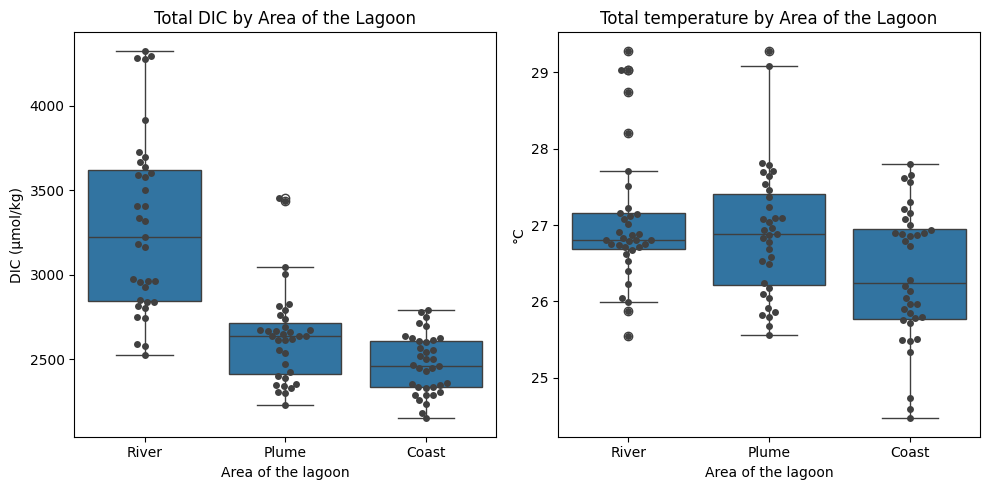

In [66]:
fig, (ax1,ax2)= plt.subplots(1,2,figsize=(10,5))
# Primer boxplot - DIC
sns.boxplot(x='area', y='dic_micromol_kg', data=tests10, ax=ax1)
sns.swarmplot(x='area', y='dic_micromol_kg', data=tests10, color=".25", ax=ax1)
ax1.set_xlabel('Area of the lagoon')
ax1.set_ylabel('DIC (μmol/kg)')
ax1.set_title('Total DIC by Area of the Lagoon')
# Segundo boxplot - Temperatura
sns.boxplot(x='area', y='temp_c', data=tests10, ax=ax2) 
sns.swarmplot(x='area', y='temp_c', data=tests10, color=".25", ax=ax2)
ax2.set_xlabel('Area of the lagoon')
ax2.set_ylabel('°C')
ax2.set_title('Total temperature by Area of the Lagoon')
plt.tight_layout()
plt.show()

In [69]:
print("Posthoc matrix: DIC ")
dunn_posthoc(tests10, 'area', 'dic_micromol_kg')

Posthoc matrix: DIC 
              Coast     Plume         River
Coast  1.000000e+00  0.063144  7.204720e-13
Plume  6.314392e-02  1.000000  1.885873e-06
River  7.204720e-13  0.000002  1.000000e+00


,Coast,Plume,River
Coast,1.000000e+00,0.063144,7.204720e-13
Plume,6.314392e-02,1.000000,1.885873e-06
River,7.204720e-13,0.000002,1.000000e+00


In [68]:
print("Posthoc matrix: Temperature ")
dunn_posthoc(tests10, 'area', 'temp_c')

Posthoc matrix: Temperature 
          Coast    Plume     River
Coast  1.000000  0.06468  0.038761
Plume  0.064680  1.00000  1.000000
River  0.038761  1.00000  1.000000


,Coast,Plume,River
Coast,1.000000,0.06468,0.038761
Plume,0.064680,1.00000,1.000000
River,0.038761,1.00000,1.000000
